In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file = '.\concrete_mix_design_simplified.csv'
df = pd.read_csv(file)
#print(df)
df = df[df['age'] >= 28]
############################################################################################################################################
feature_columns = df[[ 'weight_fresh', 'weight_at_test','density_fresh','density_at_test','q_cement',
                   'q_water','id_cement','sand_coarsness', 'q_crushed_sand', 'q_non_crushed_sand', 'q_ash', 
                   'id_crushed_sand', 'id_non_crushed_sand', 'id_ash', 'q_stone_1', 'q_stone_2', 'q_stone_3', 'id_stone', 
                    'q_airentrain', 'q_waterproofing', 'q_retardant', 'q_superplast', 'q_plast']]
#'probe_index', 'name','cement_label'，'q_crushed_sand', 'q_non_crushed_sand', 'q_ash','stone_type',

target_column1 = df['compressive_strength']  #'slump.1'
data1 = pd.concat([feature_columns,target_column1],axis=1)
data1_names = data1.columns.tolist()

In [3]:
columns_to_drop = ['weight_fresh', 'weight_at_test','density_at_test']
for column in columns_to_drop:
    del feature_columns[column]
feature_columns = pd.concat([feature_columns,target_column1],axis=1)
feature_columns = feature_columns[(feature_columns['density_fresh'] < 3000)  & (feature_columns['compressive_strength'] > 1)
                                 &(feature_columns['density_fresh'] > 1500) ]

target_column1 = feature_columns['compressive_strength']

In [4]:
feature_columns

,density_fresh,q_cement,q_water,id_cement,sand_coarsness,q_crushed_sand,q_non_crushed_sand,q_ash,id_crushed_sand,id_non_crushed_sand,...,q_stone_1,q_stone_2,q_stone_3,id_stone,q_airentrain,q_waterproofing,q_retardant,q_superplast,q_plast,compressive_strength
23,2307.579102,225.0,252.80,60.0,NaN,0.00,819.00,75.00,0.0,65.0,...,484.00,0.0,595.0,52.0,NaN,NaN,NaN,NaN,NaN,15.426049
24,2326.703259,225.0,252.80,60.0,NaN,0.00,819.00,75.00,0.0,65.0,...,484.00,0.0,595.0,52.0,NaN,NaN,NaN,NaN,NaN,15.800109
30,2275.555556,225.0,212.00,60.0,NaN,0.00,819.00,75.00,0.0,65.0,...,484.00,0.0,595.0,52.0,0.0,0.0,0.0,0.000000,0.010000,23.528889
31,2275.698158,225.0,212.00,60.0,NaN,0.00,819.00,75.00,0.0,65.0,...,484.00,0.0,595.0,52.0,0.0,0.0,0.0,0.000000,0.010000,24.545455
37,2281.481481,300.0,220.00,60.0,NaN,0.00,819.00,0.00,0.0,65.0,...,484.00,0.0,595.0,52.0,0.0,0.0,0.0,0.000000,0.010000,27.840000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7463,2367.407407,265.3,99.60,16.0,NaN,329.60,576.50,70.20,3.0,19.0,...,593.90,178.0,178.0,2.0,0.0,0.0,0.0,0.009765,0.009765,55.720000
7466,2306.666667,218.5,97.25,16.0,5.0,494.25,563.75,78.75,3.0,19.0,...,161.25,374.0,374.0,2.0,0.0,0.0,0.0,0.008562,0.008562,32.093333
7467,2322.962963,218.5,97.25,16.0,5.0,494.25,563.75,78.75,3.0,19.0,...,161.25,374.0,374.0,2.0,0.0,0.0,0.0,0.008562,0.008562,33.111111
7468,2322.147651,218.5,97.25,16.0,NaN,494.25,563.75,78.75,3.0,19.0,...,161.25,374.0,374.0,2.0,0.0,0.0,0.0,0.008562,0.008562,32.308725


In [5]:
nan_columns = feature_columns.columns[feature_columns.isna().any()].tolist()
nan_columns

['sand_coarsness',
 'id_ash',
 'id_stone',
 'q_airentrain',
 'q_waterproofing',
 'q_retardant',
 'q_superplast',
 'q_plast']

In [6]:
#feature_columns['sand_coarsness'].fillna(0, inplace=True)
for x in nan_columns:
    feature_columns[x].fillna(0, inplace=True)
feature_columns

,density_fresh,q_cement,q_water,id_cement,sand_coarsness,q_crushed_sand,q_non_crushed_sand,q_ash,id_crushed_sand,id_non_crushed_sand,...,q_stone_1,q_stone_2,q_stone_3,id_stone,q_airentrain,q_waterproofing,q_retardant,q_superplast,q_plast,compressive_strength
23,2307.579102,225.0,252.80,60.0,0.0,0.00,819.00,75.00,0.0,65.0,...,484.00,0.0,595.0,52.0,0.0,0.0,0.0,0.000000,0.000000,15.426049
24,2326.703259,225.0,252.80,60.0,0.0,0.00,819.00,75.00,0.0,65.0,...,484.00,0.0,595.0,52.0,0.0,0.0,0.0,0.000000,0.000000,15.800109
30,2275.555556,225.0,212.00,60.0,0.0,0.00,819.00,75.00,0.0,65.0,...,484.00,0.0,595.0,52.0,0.0,0.0,0.0,0.000000,0.010000,23.528889
31,2275.698158,225.0,212.00,60.0,0.0,0.00,819.00,75.00,0.0,65.0,...,484.00,0.0,595.0,52.0,0.0,0.0,0.0,0.000000,0.010000,24.545455
37,2281.481481,300.0,220.00,60.0,0.0,0.00,819.00,0.00,0.0,65.0,...,484.00,0.0,595.0,52.0,0.0,0.0,0.0,0.000000,0.010000,27.840000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7463,2367.407407,265.3,99.60,16.0,0.0,329.60,576.50,70.20,3.0,19.0,...,593.90,178.0,178.0,2.0,0.0,0.0,0.0,0.009765,0.009765,55.720000
7466,2306.666667,218.5,97.25,16.0,5.0,494.25,563.75,78.75,3.0,19.0,...,161.25,374.0,374.0,2.0,0.0,0.0,0.0,0.008562,0.008562,32.093333
7467,2322.962963,218.5,97.25,16.0,5.0,494.25,563.75,78.75,3.0,19.0,...,161.25,374.0,374.0,2.0,0.0,0.0,0.0,0.008562,0.008562,33.111111
7468,2322.147651,218.5,97.25,16.0,0.0,494.25,563.75,78.75,3.0,19.0,...,161.25,374.0,374.0,2.0,0.0,0.0,0.0,0.008562,0.008562,32.308725


In [7]:
X = feature_columns.drop('compressive_strength',axis=1)
y = feature_columns['compressive_strength']

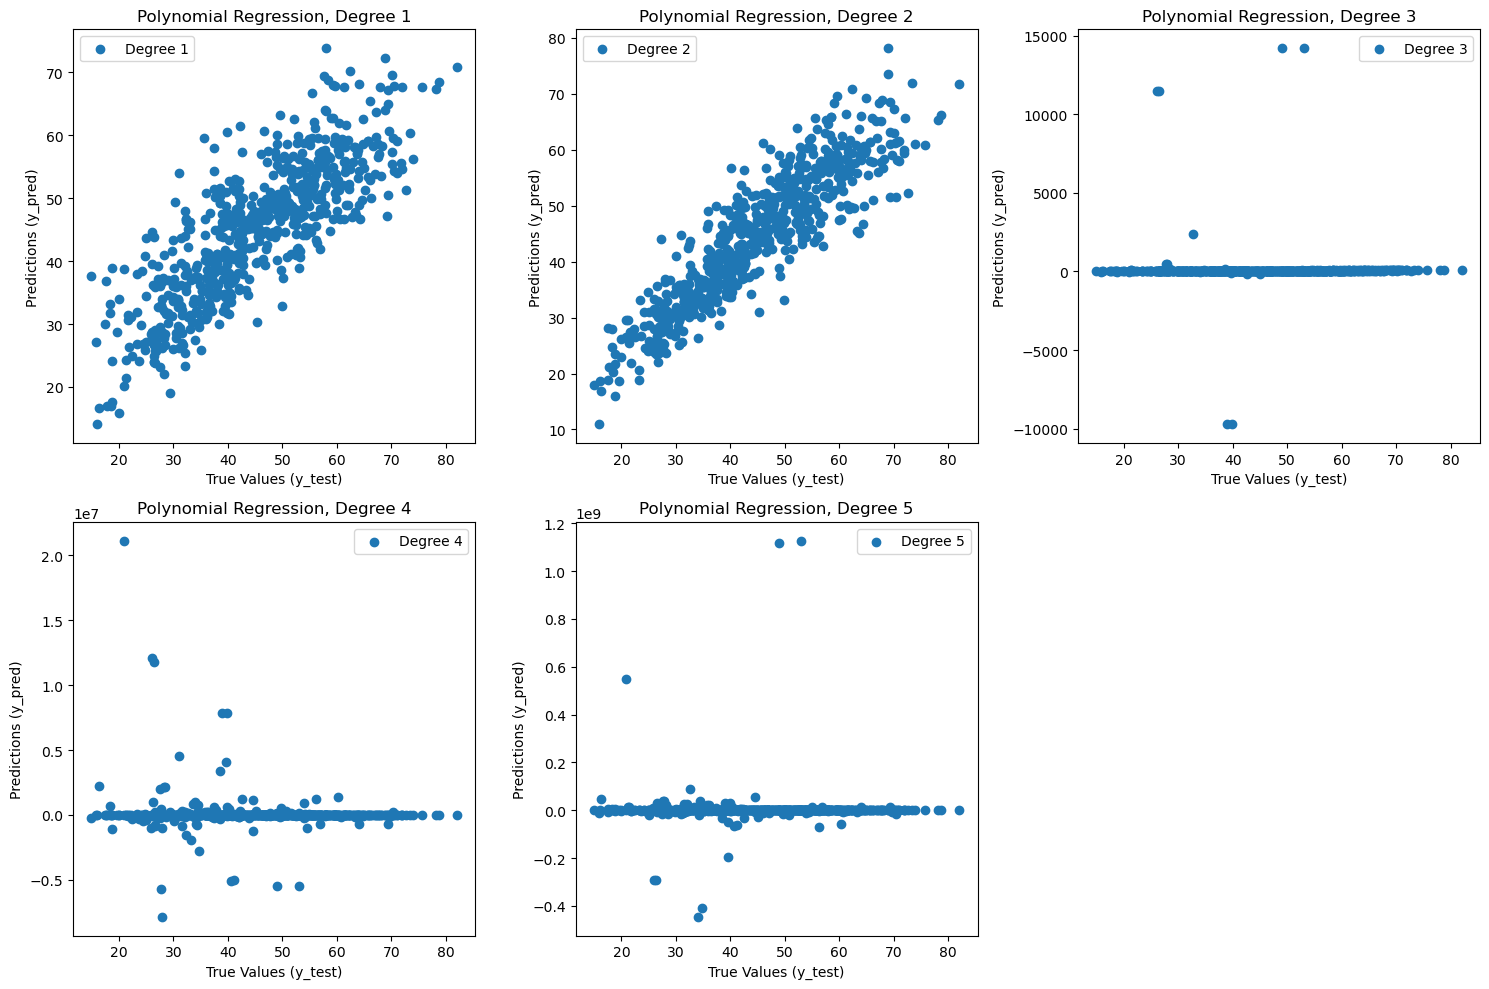

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize arrays to store the results
degrees = [1, 2, 3, 4, 5]

# Create a 2x3 grid of subplots
plt.figure(figsize=(15, 10))
for i, degree in enumerate(degrees):
    plt.subplot(2, 3, i+1)

    # Create PolynomialFeatures transformer to generate polynomial features
    poly_transformer = PolynomialFeatures(degree=degree)
    X_poly_train = poly_transformer.fit_transform(X_train)
    X_poly_test = poly_transformer.transform(X_test)

    # Create and fit the linear regression model
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly_train, y_train)

    # Make predictions using the fitted model
    y_pred = lin_reg.predict(X_poly_test)

    # Plot the predictions
    plt.scatter(y_test, y_pred, label=f'Degree {degree}')
    plt.xlabel('True Values (y_test)')
    plt.ylabel('Predictions (y_pred)')
    plt.title(f'Polynomial Regression, Degree {degree}')
    plt.legend()

plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\envs\Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.658e+04, tolerance: 4.578e+01
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\envs\Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.441e+04, tolerance: 4.578e+01
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\envs\Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

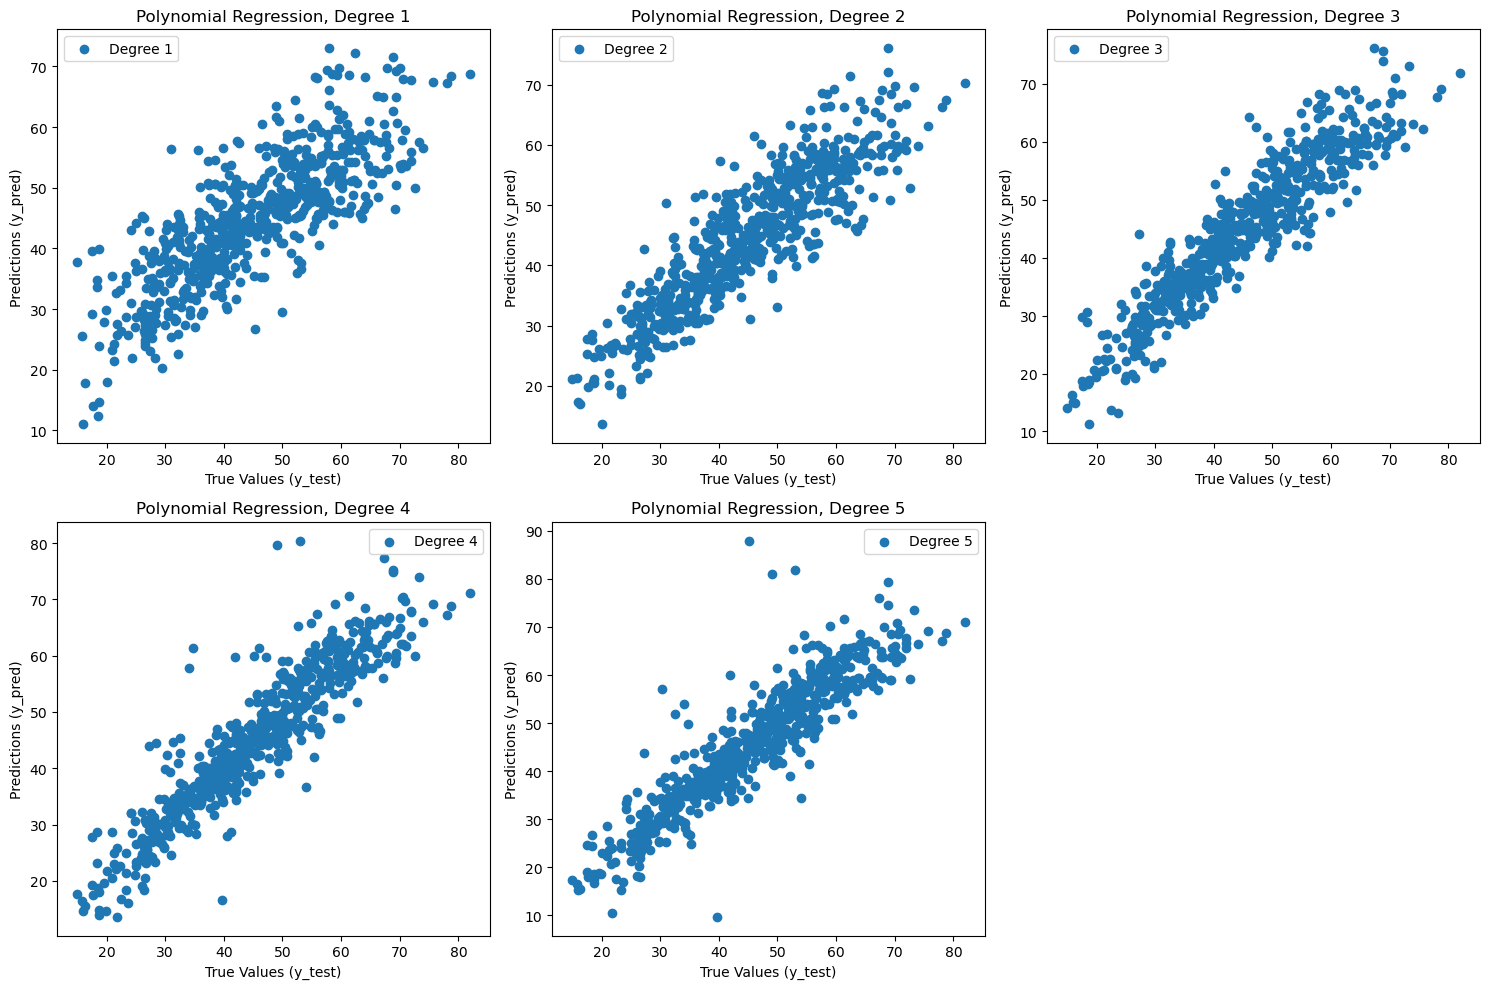

In [9]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(15, 10))
for i, degree in enumerate(degrees):
    plt.subplot(2, 3, i+1)

    # Create PolynomialFeatures transformer to generate polynomial features
    poly_transformer = PolynomialFeatures(degree=degree)
    X_poly_train = poly_transformer.fit_transform(X_train)
    X_poly_test = poly_transformer.transform(X_test)

    # Create and fit the linear regression model
    lin_reg = Lasso(alpha=0.5)
    lin_reg.fit(X_poly_train, y_train)

    # Make predictions using the fitted model
    y_pred = lin_reg.predict(X_poly_test)

    # Plot the predictions
    plt.scatter(y_test, y_pred, label=f'Degree {degree}')
    plt.xlabel('True Values (y_test)')
    plt.ylabel('Predictions (y_pred)')
    plt.title(f'Polynomial Regression, Degree {degree}')
    plt.legend()

plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\envs\Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.525e+04, tolerance: 4.578e+01
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\envs\Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.366e+04, tolerance: 4.578e+01
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\envs\Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

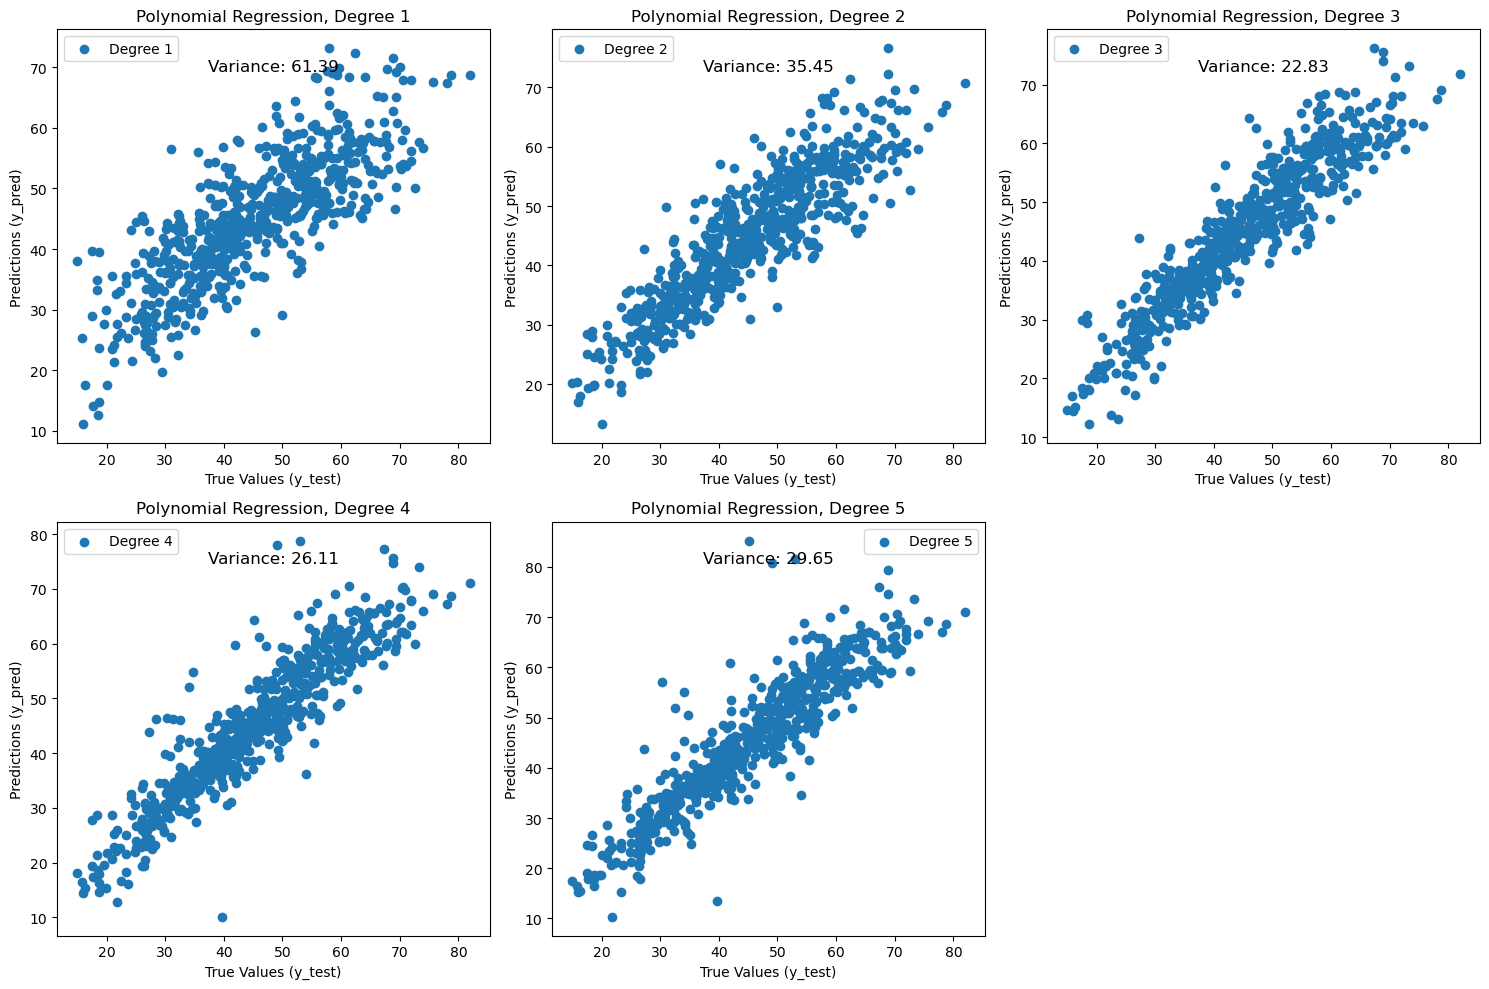

In [10]:
plt.figure(figsize=(15, 10))
for i, degree in enumerate(degrees):
    plt.subplot(2, 3, i+1)

    # Create PolynomialFeatures transformer to generate polynomial features
    poly_transformer = PolynomialFeatures(degree=degree)
    X_poly_train = poly_transformer.fit_transform(X_train)
    X_poly_test = poly_transformer.transform(X_test)

    # Create and fit the linear regression model
    lin_reg = Lasso(alpha=0.1)
    lin_reg.fit(X_poly_train, y_train)

    # Make predictions using the fitted model
    y_pred = lin_reg.predict(X_poly_test)

    # Calculate the variance between y_test and y_pred
    variance = np.var(y_test - y_pred)

    # Plot the predictions
    plt.scatter(y_test, y_pred, label=f'Degree {degree}')
    plt.xlabel('True Values (y_test)')
    plt.ylabel('Predictions (y_pred)')
    plt.title(f'Polynomial Regression, Degree {degree}')

    # Add text to display the variance
    plt.text(0.5, 0.9, f'Variance: {variance:.2f}', transform=plt.gca().transAxes, fontsize=12, ha='center')

    plt.legend()

plt.tight_layout()
plt.show()


In [11]:
'''from sklearn.linear_model import Ridge
plt.figure(figsize=(15, 10))
for i, degree in enumerate(degrees):
    plt.subplot(2, 3, i+1)

    # Create PolynomialFeatures transformer to generate polynomial features
    poly_transformer = PolynomialFeatures(degree=degree)
    X_poly_train = poly_transformer.fit_transform(X_train)
    X_poly_test = poly_transformer.transform(X_test)

    # Create and fit the linear regression model
    lin_reg = Ridge(alpha=1)
    lin_reg.fit(X_poly_train, y_train)

    # Make predictions using the fitted model
    y_pred = lin_reg.predict(X_poly_test)

    # Plot the predictions
    plt.scatter(y_test, y_pred, label=f'Degree {degree}')
    plt.xlabel('True Values (y_test)')
    plt.ylabel('Predictions (y_pred)')
    plt.title(f'Polynomial Regression, Degree {degree}')
    plt.legend()

plt.tight_layout()
plt.show()'''

"from sklearn.linear_model import Ridge\nplt.figure(figsize=(15, 10))\nfor i, degree in enumerate(degrees):\n    plt.subplot(2, 3, i+1)\n\n    # Create PolynomialFeatures transformer to generate polynomial features\n    poly_transformer = PolynomialFeatures(degree=degree)\n    X_poly_train = poly_transformer.fit_transform(X_train)\n    X_poly_test = poly_transformer.transform(X_test)\n\n    # Create and fit the linear regression model\n    lin_reg = Ridge(alpha=1)\n    lin_reg.fit(X_poly_train, y_train)\n\n    # Make predictions using the fitted model\n    y_pred = lin_reg.predict(X_poly_test)\n\n    # Plot the predictions\n    plt.scatter(y_test, y_pred, label=f'Degree {degree}')\n    plt.xlabel('True Values (y_test)')\n    plt.ylabel('Predictions (y_pred)')\n    plt.title(f'Polynomial Regression, Degree {degree}')\n    plt.legend()\n\nplt.tight_layout()\nplt.show()"

In [12]:
'''y_pred = model.predict(X_test)

print("Predicted y (Test Data):", y_pred)

# Calculate variance of y_pred and y_test
variance_between = np.var(y_pred - y_test)

print("Variance between y_pred and y_test:", variance_between)'''

'y_pred = model.predict(X_test)\n\nprint("Predicted y (Test Data):", y_pred)\n\n# Calculate variance of y_pred and y_test\nvariance_between = np.var(y_pred - y_test)\n\nprint("Variance between y_pred and y_test:", variance_between)'

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),  # Add polynomial features
    ('lin_reg', LinearRegression())  # Perform linear regression
])

# Define the hyperparameter grid for polynomial degree
param_grid = {
    'poly__degree': [1, 2, 3, 4, 5]  # Try different options for polynomial degree
}

# Initialize GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Train the best model on the entire training data
best_model.fit(X_train, y_train)

# Predict using the best model on the test data
y_pred = best_model.predict(X_test)

print("Best hyperparameters:", best_params)
print("Predicted y (Test Data):", y_pred)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Best hyperparameters: {'poly__degree': 1}
Predicted y (Test Data): [58.55758981 39.90476566 46.34220231 65.4488065  37.19226193 46.4944529
 51.55503363 47.82688774 42.72228961 49.60840911 46.29434241 53.21306785
 54.84199298 49.8327267  37.3752614  31.22141495 39.30709016 47.89217273
 37.58093253 56.31762483 34.56530075 38.6146079  58.20301347 32.98422157
 43.95219423 45.34123757 41.15501586 61.08573822 47.4313212  24.22779275
 44.33108456 59.0475537  31.82580724 52.95718716 29.58455593 43.33892291
 34.87712389 51.15314179 70.80650289 49.16840552 40.3235429  40.86340548
 43.97631869 47.17583991 33.30378901 37.91832729 26.80060713 54.5658399
 34.51202119 44.89267337 37.35330435 34.83022436 53.75853837 57.62817406
 25.67233314 50.4595068  46.13627009 51.69585828 50.8352982  50.90048569
 29.02966345 30.22969842 42.17043866 38.94901235 50.41304028 50.79620205
 31.7397146  28.77670273 34.01512088 27.67834942 35.34653783 44.19286604
 51.44593717 46.10409984 34.3618369  33.96467228 36.0063554